In [111]:
import sys, os, decimal, json
sys.path.append(os.path.realpath('..'))

import mss
import mss.tools
import socket, time, uuid

import numpy as np
import cv2
from PIL import Image, ImageDraw

In [49]:
config_dir = r'../MiningBot/Configs/configs.json'
config = json.load(open(config_dir))[socket.gethostname()]

In [50]:
def get_screen():
    with mss.mss() as sct:
        mon = sct.monitors[config['monitor_number']]

        # The screen part to capture
        monitor = {
            "top": mon["top"],
            "left": mon["left"],
            "width": mon["width"],
            "height": mon["height"],
            "mon": config['monitor_number'],
        }

        # Grab the data
        img = np.array(sct.grab(monitor))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(img)
        return img

In [76]:
img = get_screen()

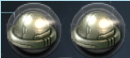

In [79]:
this_image = img.crop(config['miners'])
this_image

In [86]:
np.array(this_image)[0].append(this_image[0])

AttributeError: 'numpy.ndarray' object has no attribute 'append'

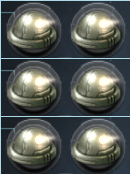

In [89]:
Image.fromarray(np.concatenate([, np.array(this_image), np.array(this_image)], axis=0))

In [123]:
image_stack = []
for i in range(10):
    img = get_screen()
    image_stack.append(np.array(img.crop(config['miners'])))
    time.sleep(0.1)
final_img = Image.fromarray(np.concatenate(image_stack, axis=0))
final_img.save(fr'../training_data_miner\Unlabeled/{uuid.uuid1()}.png')

UUID('01b52f2c-bab1-11ed-9911-2cf05d9fe8eb')